In [1]:
import nltk
text = "In Brazil they drive on the right-hand side of the road. has a large coastline on the eastern side of South America"

from nltk.tokenize import word_tokenize
token = word_tokenize(text)
token

['In',
 'Brazil',
 'they',
 'drive',
 'on',
 'the',
 'right-hand',
 'side',
 'of',
 'the',
 'road',
 '.',
 'has',
 'a',
 'large',
 'coastline',
 'on',
 'the',
 'eastern',
 'side',
 'of',
 'South',
 'America']

In [2]:
['In', 'Brazil', 'they', 'drive', 'on', 'the', 'right hand', 'side', 'of', 'the', 'road', '.', 'Brazil', 'has', 'a', 'large', 'coastline', 'on', 'the', 'eastern', 'side','of','South', 'America'] 

['In',
 'Brazil',
 'they',
 'drive',
 'on',
 'the',
 'right hand',
 'side',
 'of',
 'the',
 'road',
 '.',
 'Brazil',
 'has',
 'a',
 'large',
 'coastline',
 'on',
 'the',
 'eastern',
 'side',
 'of',
 'South',
 'America']

In [3]:
from nltk.probability import FreqDist
fdist = FreqDist(token)
fdist

FreqDist({'the': 3, 'on': 2, 'side': 2, 'of': 2, 'In': 1, 'Brazil': 1, 'they': 1, 'drive': 1, 'right-hand': 1, 'road': 1, ...})

In [4]:
from nltk.probability import FreqDist
fdist = FreqDist(token)
fdist1 = fdist.most_common(10)
fdist1

[('the', 3),
 ('on', 2),
 ('side', 2),
 ('of', 2),
 ('In', 1),
 ('Brazil', 1),
 ('they', 1),
 ('drive', 1),
 ('right-hand', 1),
 ('road', 1)]

<Axes: xlabel='Key'>

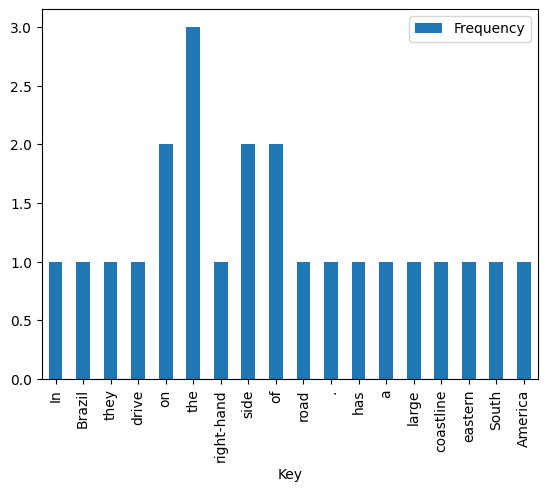

In [5]:
import pandas as pd

df_freq_tokens = pd.DataFrame.from_dict(fdist,
                                        orient='index')
df_freq_tokens.columns = ['Frequency']
df_freq_tokens.index.name = 'Key'

df_freq_tokens.plot(kind='bar')

In [6]:
from nltk import word_tokenize
from nltk.corpus import stopwords
a = set(stopwords.words('english'))
text = "Cristiano Ronaldo was born on February 5, 1985, in Funchal, Madeira, Portugal."

text1 = word_tokenize(text.lower())

print(text1)
stopwords = [x for x in text1 if x not in a]
print(stopwords)

['cristiano', 'ronaldo', 'was', 'born', 'on', 'february', '5', ',', '1985', ',', 'in', 'funchal', ',', 'madeira', ',', 'portugal', '.']
['cristiano', 'ronaldo', 'born', 'february', '5', ',', '1985', ',', 'funchal', ',', 'madeira', ',', 'portugal', '.']


In [7]:
# Contoh stemming di NLTK
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

S = 'presumably I would like to MultiPly my provision, saying tHat without crYing'
print('Sentence: ',S)

stemmer_list = [LancasterStemmer, PorterStemmer, SnowballStemmer]
names = ['Lancaster', 'Porter', 'SnowBall']
for stemmer_name,stem in zip(names,stemmer_list):
    if stemmer_name == 'SnowBall':
        st = stem('english')
    else:
        st = stem()
    print(stemmer_name, ': ',' '.join(st.stem(s) for s in S.split()))
    # perhatikan, kita tidak melakukan case normalization (lowercase)
    # Hasil stemming bisa tidak bermakna

Sentence:  presumably I would like to MultiPly my provision, saying tHat without crYing
Lancaster :  presum i would lik to multiply my provision, say that without cry
Porter :  presum i would like to multipli my provision, say that without cri
SnowBall :  presum i would like to multipli my provision, say that without cri


In [8]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

print("rocks :", lemmatizer.lemmatize("rocks"))
print("corpora :", lemmatizer.lemmatize("corpora"))

rocks : rock
corpora : corpus


In [9]:
# Comntoh PDS tags dengan NLTK (bahasa Inggris)
from nltk import pos_tag
S = 'I am currently learning NLP in English, but if possible I want to know NLP in Indonesian language too'

tokens = word_tokenize(S)
print(pos_tag(tokens))
# Tidak lagi hanya 98 macam tags seperti yang dibahas ahli bahasa (Linguist)

[('I', 'PRP'), ('am', 'VBP'), ('currently', 'RB'), ('learning', 'VBG'), ('NLP', 'NNP'), ('in', 'IN'), ('English', 'NNP'), (',', ','), ('but', 'CC'), ('if', 'IN'), ('possible', 'JJ'), ('I', 'PRP'), ('want', 'VBP'), ('to', 'TO'), ('know', 'VB'), ('NLP', 'NNP'), ('in', 'IN'), ('Indonesian', 'JJ'), ('language', 'NN'), ('too', 'RB')]


In [10]:
# Contoh tokenisasi dengan TextBlob
from textblob import TextBlob

T = "Hello, mr. Man. He smiled!! This, i.e. that, is it."
sentence_tokens = TextBlob(T).sentences

# Tokenisasi kata
print(TextBlob(T).words)

# Tokenisasi kalimat
print([str(sent) for sent in sentence_tokens])

['Hello', 'mr', 'Man', 'He', 'smiled', 'This', 'i.e', 'that', 'is', 'it']
['Hello, mr. Man.', 'He smiled!!', 'This, i.e.', 'that, is it.']


In [11]:
# Contoh TextBlob Stemming & Lemmatizer
from textblob import Word
# Stemming
print("Stem: ", Word('running').lemmatize('v'))

#default Noun, plural akan menjadi singular dari akar katanya
# Juga case sensitive

Stem:  run


In [12]:
# Contoh PDS tag dengan TextBlob pada bahasa Inggris
for word, pos in TextBlob(T).tags:
    print(word, pos, end=', ')

Hello NNP, mr. NN, Man NNP, He PRP, smiled VBD, This DT, i.e NN, that DT, is VBZ, it PRP, 

In [13]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.tokenize import word_tokenize
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
kalimat = "Andi kerap melakukan transaksi rutin secara daring atau online. Menurut Andi belanja online lebih praktis"
stop = stopword.remove(kalimat.lower())
print(stop)

andi kerap melakukan transaksi rutin daring online. andi belanja online lebih praktis


In [14]:
# Lemmatizer dengan Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stemmer = StemmerFactory().create_stemmer()

I = "perayaan itu berbarengan dengan saat kita bepergian ke Makassar"
print(stemmer.stem(I))
print(stemmer.stem("Perayaan Bepergian Menyuarakan"))
# Ada beberapa hal yang berbeda antara Sastrawi dan modul-modul diatas.
# Apa sajakah?

raya itu bareng dengan saat kita pergi ke makassar
raya pergi suara


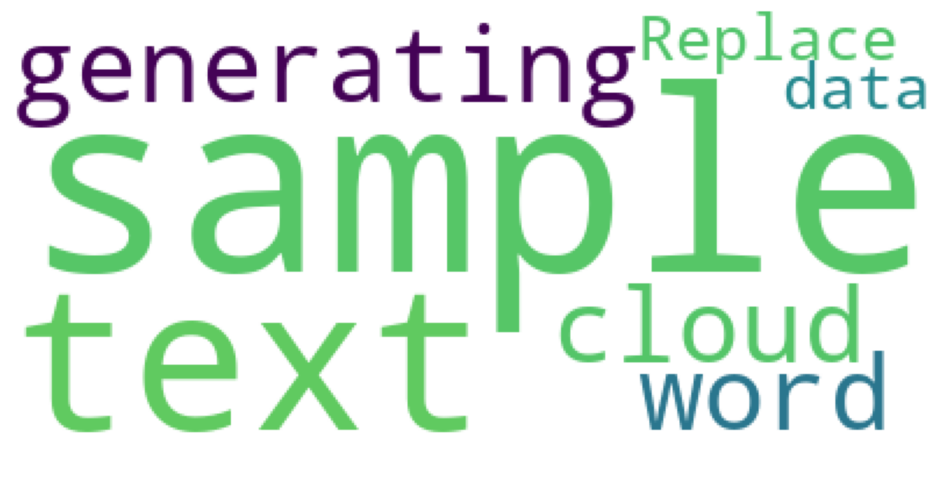

In [15]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud

string = "This is a sample text for generating a word cloud. Replace it with your data."
wordcloud = WordCloud(background_color="white").generate(string)


#plot the wordcloud
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)

#to remove the axis value
plt.axis("off")
plt.show()

In [16]:
import pickle
import os
import re
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

src_name = "D:/Semester 5/20newsgroup.pckl"
src_path = os.path.join("data", src_name)
with open(src_path, 'rb') as fin:
    data = pickle.load(fin)

docs = [doc for doc in data.data]
label = data.target

def preprocess(doc):
    sents = word_tokenize(doc)
    sents_tok = list() #tokenisasi kalimat
    sents = [t for t in sents if t not in stop_words]
    for s in sents:
        s = s.strip().lower() # case folding dan menghilangkan new line
        s = s.replace("\n", " ") # menggantikan \n dengan spasi
        s = re.sub(r' [^a-zA-Z0-9 ]', ' ', s) # menghapus simbol
        s = re.sub(' +', ' ', s) #menghapus repetitive space
        sents_tok.append(s)
    return " ".join(sents_tok)

docs_clear = list()
for d in docs:
    docs_clear.append(preprocess(d))

print('DONE!')
print (docs_clear)

DONE!
['i want get car alarm i thinking getting ungo box . does anyone knowledge experience alarms ? how price ranges different models ? are good car alarms ? please email responces . cak3 @ ns3.lehigh.edu', "i hear question asked radio news update case . ( they talking ongoing trial audio clips ) . immediately defense attorney asked question , `` objection ! '' heard background . the clip ended point i n't know objection upheld . i ca n't imagine nc * * bad . this i n't hear audio clip heard reported number times news stories trial . now `` purpose '' thing stretching , i think something like -- coming . if somebody else remebers better i second point , feel free clarify . frank -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- frank r. chloupek chloupek @ ohstpy.mps.ohio-state.edu department physics -- * the * ohio state university ( not ohio state university )", "quoting jeffrey j. nucciarone 's ( nucci @ microwave.gsfc.na

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)
X = tfidf_vectorizer.fit_transform(docs_clear)
print(X.shape)

k = 3
seed = 99
km = KMeans(n_clusters=k, init='random', max_iter=300, random_state=seed)
km.fit(X)

C_km = km.predict(X)
print(C_km[:10])


(1653, 10706)


c:\Users\ditha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0 1 0 1 1 0 1 1 1 1]


In [18]:
from sklearn.cluster import KMeans

k = 5
seed = 99
kMPP = KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, random_state=seed)
kMPP.fit(X)

C_kmpp = kMPP.predict(X)
print(C_kmpp[:10])


[3 2 3 4 0 0 2 0 2 4]


In [19]:
import numpy as np
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5)
dbscan.fit(X)
labels = dbscan.labels_.astype(int)
print(labels[:10])


[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [20]:
from sklearn.cluster import DBSCAN

# Assume X is your dataset
db = DBSCAN(eps=0.5, min_samples=5)
C_db = db.fit_predict(X)

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# Assuming X is your data
km = KMeans(n_clusters=3).fit(X)
C_km = km.labels_

# KMeans++ initialization is default in KMeans
kmpp = KMeans(n_clusters=3, init='k-means++').fit(X)
C_kmpp = kmpp.labels_

# DBSCAN clustering
db = DBSCAN(eps=0.5, min_samples=5).fit(X)
C_db = db.labels_

# Now you can store them in a list and compute silhouette scores
C = [C_km, C_kmpp, C_db]

for res in C:
    print(silhouette_score(X, res), end=', ')


0.01735481704652638, 0.016863371676123798, -0.23699415932096538, 

In [21]:
from sklearn.metrics.cluster import homogeneity_score as purity

for res in C:
    print(purity(label,res), end=', ')

0.1908552799194923, 0.27521091904253914, 0.0015549989772357536, 

In [22]:
# Evaluasi eksternal NMI
from sklearn.metrics import normalized_mutual_info_score as normalized_mutual_info
from sklearn.metrics import normalized_mutual_info_score as normalized_mutual_info

# Assuming label contains the true labels of your data
for res in C:
    print(normalized_mutual_info(label, res), end=', ')

0.2457077717914317, 0.3376233103842345, 0.002704356633566744, 